# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## (1)
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

Прикрепил фото вместе с этим ноутбуком.

## (2)
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи
- (текст) формулировка признакового описания объектов
- (текст, формулы) формулировка модели многослойного перцептрона
- (текст, формулы) формулировка функции ошибки
- (текст, формулы) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (формулы, код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона. Имеется в виду только один скрытый слой;
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- отдельные экземпляры выборки в виде изображений;
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перекрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

## Формулировка задачи и модели
Нам необходимо реализовать модель трехслойного перцептрона. Мы принимаем за первый слой входные данные, затем - скрытый слой с функцией активации, последний слой с функцией активации ответ нашей модели.

Обучать перцептрон мы будем на наборе MNIST. Мы строим модель, которая будет каждой картинке 28х28 ставить в соответствие число, которое на ней изображено.

Многослойный перцептрон можно определить следующим образом:

$$
\begin{equation}
    \begin{cases}
    h_1 = \psi_1(\theta_1^T \cdot x)
    \\
    h_2 = \psi_2(\theta_2^T  \cdot h_1)
    \\
    \vdots
    \\
    h_k = \psi_k(\theta_k^T \cdot h_{k-1})
    \\
    y = \psi_{k+1}(\theta_{k+1}^T \cdot h_k)
    \end{cases}
\end{equation}
$$

где $x$ - объект, $\theta_i$ - матрица параметров, по которым будет происходить оптимизация, $\psi_i$ - функция активации, $y$ - предсказание целевого значения, в нашем случае число на картинке.

Также можем определить перцептрон следующим образом:  $F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right)$ , где $x$ - датасет, где вектора из $R^{784}$. Результатом работы будет one-hot вектор длиной 10, где единица стоит на месте с координатой истинной метки, а предсказанием алгоритма является вектор из вероятнотстей принадлежности каждому класу.

## Формулировка функции ошибки

Целевая переменная $y$ имеет мультиномиальное распределение, поэтому мы можем использовать $Cross   Entropy$ как функцию потерь.

Функция потерь будет иметь вид:  $\mathcal{L} = -\frac{1}{m}\sum^{m}_{i=1} {\sum^{K}_{j=1} {y_{j}^{(i)}\ln{\hat{y}_{j}^{(i)}}}}$, где $\hat{y}_{j}^{(i)}$ предсказанное целевое значение, $K$ - количество классов, $m$ - размер мини-батча.

Стоит упомянуть про функции активации: в скрытом слое мы будем использовать нелинейную 𝑅𝑒𝐿𝑈(𝑥) = max (0,𝑥), а в выходном, обобщение сигмоида на многоклассовую классификацию 𝑆𝑜𝑓𝑡𝑚𝑎𝑥$(x_i)$  = $\frac{\exp{x_i}}{\sum_{k=0}^{n} \exp{x_k}}$.

Обучаемыми параметрами сети являются все веса, с которыми суммируются входы всех нейронов. Будем обучать их методом $Stochastic$ $Gradient$ $Descent$.

Стохастический градиентный спуск отличается от простого градиентного спуска тем, что вычисление градиента производится не на всей выборке, а только на её части. Это необходимо в том случае, если выборка слишком большая, так как иначе, если бы мы вычисляли градиент по всей выборке, это заняло бы много времени. В нашей задаче мы предполагаем, что данные взяты из какого-то одного распределения и поэтому можно использовать для оценки градиента только часть данных.

Производную функции потерь по параметрам перцептрона будем вычислять при помощи back propagation - способ вычисления производной функции потерь по параметрам сети, основанный на понятии вычислительного графа и правиле взятия производной сложной функции. 

В каждом нейроне мы хотим уметь считать производную выхода этого нейрона по входу этого нейрона. Будем передавать полученное значение производной к предыдущему нейрону и так, накапливая результат, в соответствии с правилом вычисления производной сложной функции, на уровне входного слоя получим искомые значения градиентов функции потерь по параметрам.

$$\frac{\partial L(\theta, x)}{\partial \theta_1} = \frac{\partial L(\theta, x)}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \theta_1} = \frac{\partial L(\theta, x)}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial Softmax} ...$$

## Формулировка меры качества модели

Датасет MNIST сбалансирован по целевой переменной, поэтому можем использовать метрику *accuracy* (Доля верных ответов).

$$accuracy = \frac{ \sum_{i=1}^{N} \langle{y_i == \hat{y_i}}\rangle}{N}$$

In [1]:
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

Загрузим наши данные.

In [4]:
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']

Убедимся, в их корректности.

2


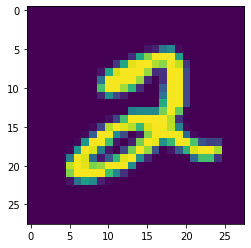

In [5]:
plt.imshow(x_train[5])
print(y_train[5])

Обратим внимание на формат наших выборок. Нам необходимо преобразовать их от вида (..., 28, 28) к (..., 784).

In [6]:
print('Before: ', x_train.shape)
X_train = x_train.reshape(x_train.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)
print('After: ', X_train.shape)

Before:  (60000, 28, 28)
After:  (60000, 784)


Посмотрим распредление нашей целевой переменной.

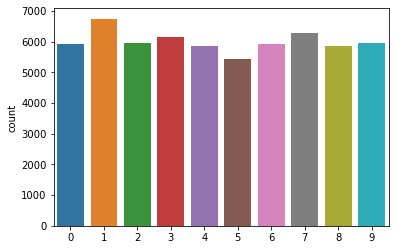

In [7]:
sns.countplot(y_train)

Значения в этих датасетах лежат в промежутке [0, 255]. У нас оптимизация градиентная, поэтому нормализуем данные по формуле 
$x= \frac{x - x_{min}}{x_{max} - x_{min}}$

Также, так как мы решаем задачу многоклассовой классификации, оптимизируя $Cross$ $Entropy$ как функцию потерь (и используя $Softmax$, который возвращает вектор из вероятностей), то целевая переменная должна быть не числом, а One-Hot вектором.

In [8]:
def Normalization(X):
    
    min_value = X.min(axis=0)
    max_value = X.max(axis=0)
    
    return (X - min_value) / (max_value - min_value + 1e-100)

def OneHotEnc(y, k = 10):
    
    one_hot = np.empty((y.shape[0], k))
    
    for i, targ in enumerate(y):
        one_hot[i] = np.array([1 if targ == z else 0 for z in np.arange(k)])
        
    return one_hot

In [9]:
X_train_norm = Normalization(X_train)
X_test_norm = Normalization(X_test)
y_train_ohe = OneHotEnc(y_train)
y_test_ohe = OneHotEnc(y_test)

### Перейдем к реализации нашей модели

- `Differentiable` - абстрактный базовый класс для всех модулей нейронной сети.

- `Loss` - класс для описания функционала ошибки, а именно CrossEntropy.

- `Linear` - класс, описывающий линейную часть модели.

- `Activation` - класс для функции активации ReLU.

- `Softmax` - класс для функции активации Softmax.

- `Perceptron` - класс с архитектурой нейронной сети.

In [10]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

In [11]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
        self.cache = None
    
    def forward(self, y_true, y_pred):
        # Метод реализует вычисление значения функции потерь
        
        self.cache = y_pred
        loss_value = np.sum(y_true * np.log(y_pred), axis=1)
                
        return np.negative(loss_value.mean())
    
    
    def backward(self, y_true):
        # Метод реализует вычисление градиента функции потерь по аргументу y_pred
        
        partial_grad = np.zeros_like(self.cache)
        partial_grad = np.negative(y_true / self.cache)
        
        return partial_grad

In [12]:
class Linear(Differentiable):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.cache = None
        self.in_features = in_features
        self.out_features = out_features    
        self.theta = np.random.randn(in_features, out_features) * 0.001
        self.bias = np.zeros(self.out_features)
    
    def __call__(self, X):
        # Мтод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, upstream_grad, lr):
        # Метод реализует вычисление компоненты градиента функции потерь
        
        self.dL_dtheta = np.dot(self.cache.T, upstream_grad)
        self.dL_dx = np.dot(upstream_grad, self.theta.T)
        self.dL_db = upstream_grad.sum(0)

        if lr != 0:
            self.theta -= lr * self.dL_dtheta
            self.bias -= lr * self.dL_db 
        
        return self.dL_dx
    
    def forward(self, X):
        # Метод предназначен для применения модели к данным
        
        self.cache = X     
        y_pred = np.matmul(X, self.theta) + self.bias

        return y_pred

In [13]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.cache = None
    
    def __call__(self, X):
        # Метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, upstream_grad):
        # Метод реализует вычисление компоненты градиента функции потерь
        
        X = self.cache
        partial_grad = np.multiply(upstream_grad, X > 0)
        
        return partial_grad

    
    def forward(self, X):
      
        self.cache = X
        return np.maximum(X, 0)

In [14]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        
    def __call__(self, X):
        # Метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    @staticmethod
    def jacobian(x):
        # Метод возвращает якобиан Softmax
        
        x = x.reshape(-1,1)
        return np.diagflat(x) - np.dot(x, x.T)
    
    def backward(self, upstream_grad):
        # Метод реализует вычисление компоненты градиента функции потерь
        
        forward_value = self.forward(self.cache)[:, np.newaxis]
        jacobian = np.squeeze(np.apply_along_axis(Softmax.jacobian, axis = 2, arr = forward_value))     
        
        upstream = upstream_grad[:, np.newaxis]
        partial_grad = np.squeeze(upstream @ jacobian)
        
        return partial_grad 
    
    def forward(self, X):

        self.cache = X
        output = np.subtract(X, X.max(axis=1, keepdims=True))
        output = np.exp(output) / np.sum(np.exp(output), axis=1, keepdims=True) 
        
        return output

In [15]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = Linear(784, 128)
        self.actv = Activation()
        self.linear2 = Linear(128, 10)
        self.sm = Softmax()
    
    def __call__(self, X):
        # Метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, upstream_grad, lr):
        # Метод реализует вычисление компоненты градиента функции потерь
        upstream_grad = self.sm.backward(upstream_grad)
        upstream_grad = self.linear2.backward(upstream_grad, lr)
        upstream_grad = self.actv.backward(upstream_grad)
        upstream_grad = self.linear.backward(upstream_grad, lr)
        
        return upstream_grad
    
    def forward(self, X):
        # Здесь следует собственно применить модель к входным данным
        
        y_pred = self.linear(X)
        y_pred = self.actv(y_pred)
        y_pred = self.linear2(y_pred)
        y_pred = self.sm(y_pred)
        
        return y_pred

Определим функцию по генерации "батчей" для использования SGD.

In [16]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for i in range(len(X) // batch_size):
        perm_start = i * batch_size
        perm_end = perm_start + batch_size
        ind = perm[perm_start : perm_end]
        yield (X[ind], y[ind])

Определим функцию для оценки качества модели.

In [17]:
def _accuracy_score(y_true, y_pred, epoch, epoch_all):
    max_proba = np.argmax(y_pred, axis=1)
    one_hot = OneHotEnc(max_proba)
    epoch += (one_hot == y_true).all(axis=1).sum()
    epoch_all += len(y_true)
        
    return epoch / epoch_all

Обучение нашей модели.

In [18]:
def train_loop(X, y, X_test, y_test, model, loss_fn, epochs=100):
    
    loss_history_train = [] #Для хранения эволюции лосса на тренировочной выборке
    loss_history_test = [] #Для хранения эволюции лосса на тестовой выборке
    
    accuracy_train_history = [] #Для хранения эволюции метрики качества на тренировочной выборке
    accuracy_test_history = [] #Для хранения эволюции метрики качества на тестовой выборке
    
    epoch_correct_train = 0 # Для вычисления метрики
    epoch_all_train = 0

    epoch_correct_test = 0
    epoch_all_test = 0
    
    pbar = tqdm(total=epochs)
    
    batch_size = 128
    lr = 0.001
    
    for epoch in range(epochs):
        for X_batch, y_batch in generate_batches(X, y, batch_size):
            y_pred = model(X_batch)
            loss_value = loss_fn.forward(y_batch, y_pred)
            upstream_grad = loss_fn.backward(y_batch)
            grad = model.backward(upstream_grad, lr)
        
        loss_value_train = loss_fn.forward(y, model(X))
        loss_history_train.append(loss_value_train)
        
        loss_value_test = loss_fn.forward(y_test, model(X_test))
        loss_history_test.append(loss_value_test)
        
        accuracy_train = _accuracy_score(y, model(X), epoch_correct_train, epoch_all_train)
        accuracy_train_history.append(accuracy_train)
        
        accuracy_test = _accuracy_score(y_test, model(X_test), epoch_correct_test, epoch_all_test)
        accuracy_test_history.append(accuracy_test)
          
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value_train, 'accuracy train': accuracy_train})
    pbar.close()
    return loss_history_train, loss_history_test, accuracy_train_history, accuracy_test_history

In [19]:
obj_fn = loss()
model = Perceptron()
loss_history_train, loss_history_test, accuracy_train_history, accuracy_test_history = train_loop(
                          X_train_norm,
                          y_train_ohe, 
                          X_test_norm, 
                          y_test_ohe,
                          model,
                          obj_fn,
                          epochs = 100)

100%|████████████████████████████| 100/100 [05:59<00:00,  3.60s/it, loss=0.00342, accuracy train=1]


Построим графики эволюции функции потерь и метрики качества.

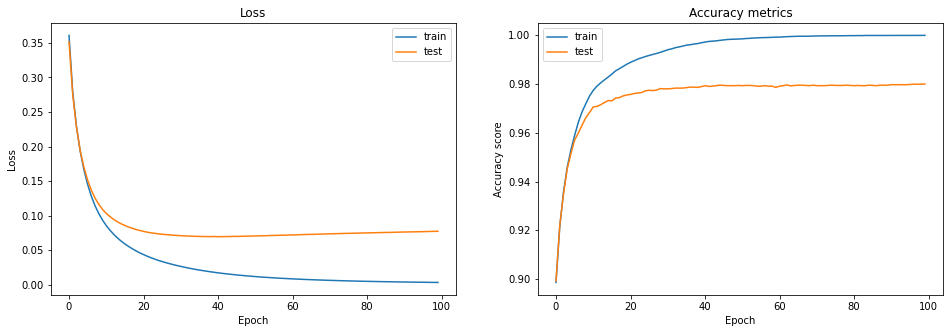

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5));

ax[0].plot(loss_history_train, label='train')
ax[0].plot(loss_history_test, label='test')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(accuracy_train_history, label='train')
ax[1].plot(accuracy_test_history, label='test')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy score')
ax[1].set_title('Accuracy metrics')
ax[1].legend();

### Оценка качества

Воспользовавшись метрикой accuracy_score из sklearn посмотрим итоговую оценку нашей модели на тренировочной и тестовой выборке.

In [21]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.forward(X_train_norm), axis=1)
print('Final accuracy on train = %.5f' % accuracy_score(y_train, y_pred))

y_pred = np.argmax(model.forward(X_test_norm), axis=1)
print('Final accuracy on test = %.5f' % accuracy_score(y_test, y_pred))

Final accuracy on train = 0.99993
Final accuracy on test = 0.98000


## Вывод
В данной работе мы реализовали модель трехслойного перцептрона, которую обучили классфицировать датасет MNIST. В плане оптимизации вычислений, использовался back propagation и SGD.

Модель дает очень хорошую производительность на всех наборах данных и хорошо справилась со своей задачей, об этом свидетельствует значение метрики. Данных в нашем датасете достаточно, мы не сталкиваемся с переобучением и недообучением.